- Começo da pandemia em Pernambuco: 12 de março de 2020.
- inicio da vacinação em pernambuco: 18 de Janeiro de 2021
- Pernambuco atinge 50% da população vacinável com imunização completa contra a Covid-19: 07/10/2021.

### Definições

In [1]:
import numpy as np
from scipy.integrate import solve_ivp 

class individual:
  def __init__(self, _alpha, _beta) -> None:
    self.alpha = _alpha
    self.beta = _beta
    self.assessment = 0
  def setAssessment(self, f): 
    self.assessment = f(self)
  def __str__(self):
    return f'α:{self.alpha}, β: {self.beta}, avaliação: {self.assessment}'


### Dados

In [2]:

#01/11/2021 - 30/11/21
start =  [632011,
                      632187,
                      632366,
                      632676,
                      633139,
                      633807,
                      633998,
                      634065,
                      634380,
                      634857,
                      635198,
                      635488,
                      635910,
                      636081,
                      636135,
                      636185,
                      636562,
                      636774,
                      637077,
                      637396,
                      637566,
                      637689,
                      637995,
                      638268,
                      638595,
                      639000,
                      639373,
                      639479,
                      639507,
                      639737
    
]

### Funções do algoritmo evolucionairo

In [3]:
import math

def classification(i, compare):
  def SIR(t,Y):
    S,I = Y
    dS = -i.alpha*S*I
    dI = i.alpha*S*I -i.beta*I
    return np.array([dS,dI], float)
  _solution = solve_ivp(SIR,[0,len(compare)],[1-compare[0][1],compare[0][1]],t_eval=np.linspace(0, len(compare), 1000))
  all_minimal_distance = []
  for j in compare:
    distance = [math.sqrt(math.pow(j[0] - jj[1],2) + math.pow(j[1] - _solution.y[1][jj[0]],2)) 
                for jj in enumerate(_solution.t)]
    all_minimal_distance.append(min(distance))
  return sum(all_minimal_distance)

evaluate = lambda i: classification(i,[[j[0],j[1]/9616621] for j in enumerate(start)])

def getBest(a):
  avaliation = [i.assessment for i in a]
  minimum = min(avaliation)
  index = avaliation.index(minimum)
  return a[index] 


### Algoritmo

In [4]:
import random

def auto():
    executionTime = 150

    generation = 75
    generation_size = 20
    precision = 1

    population = []
    population.append([individual(random.random()*0.01,random.random()*0.01) for i in range(generation_size)]) #Individuos iniciais

    b = 0
    for g in range(executionTime):
    #Avalia os individuos
        for i in population[g]:
            i.setAssessment(evaluate)
    #Seleciona o melhor individuo
        best = getBest(population[g])
    #Faz mutações no melhor individuo
        range_min_alpha = min(best.alpha, 1 - best.alpha)
        range_min_beta = min(best.beta, 1 - best.beta)
        population.append([
            individual(
                best.alpha+random.uniform(-range_min_alpha/math.pow(10,precision),range_min_alpha/math.pow(10,precision)),
                best.beta+random.uniform(-range_min_beta/math.pow(10,precision),range_min_beta/math.pow(10,precision))
            ) for i in range(generation_size-1)]+[best])
    
    #Atualiza as gerações
        if g%generation == 0 and g != 0:
            precision = precision + 1
        b = getBest(population[-2])
        if g == 1 and b.assessment >= 0.2:
            break
    return [b, b.alpha/b.beta]

In [5]:

entity,r0 = [],[]

amount = 16

while len(entity) < amount:
    a = auto()
    if abs(a[0].assessment - 0.176) <=  0.05:
        entity.append(a[0])
        r0.append(a[1])
    print(f'Entidades: {len(entity)}/{amount} => {a[0].assessment} (α, β) = ({a[0].alpha}, {a[0].beta})')

# table = pd.DataFrame({'α': al,'β': bt, 'R0': r0})

Entidades: 1/16 => 0.22529724317008723 (α, β) = (0.007910283902580287, 0.006865711150429303)
Entidades: 2/16 => 0.22529394885684992 (α, β) = (0.0024523712768482623, 0.0018624920859947312)
Entidades: 3/16 => 0.22527354820918255 (α, β) = (0.007331974171255149, 0.0063576805787788505)
Entidades: 4/16 => 0.22527491510393988 (α, β) = (0.0016129141217338158, 0.001070642716478415)
Entidades: 5/16 => 0.22528157105638658 (α, β) = (0.007919623878347624, 0.006935237210539821)
Entidades: 6/16 => 0.2254566184731608 (α, β) = (0.007222684135700685, 0.006365703393954913)
Entidades: 7/16 => 0.22551559054323875 (α, β) = (0.0003751419406947611, 1.9679782204225788e-05)
Entidades: 8/16 => 0.22527368501579237 (α, β) = (0.003171082563464138, 0.0025098081185397185)
Entidades: 9/16 => 0.22544686048031368 (α, β) = (0.00354546673598067, 0.0027533479241845077)
Entidades: 10/16 => 0.22530107818102937 (α, β) = (0.009319356649353122, 0.008239540320513593)
Entidades: 11/16 => 0.2252560386937144 (α, β) = (0.00860251299

In [6]:
import pandas as pd
al = [i.alpha for i in entity]
bt = [i.beta for i in entity]
av = [i.assessment for i in entity]
table = pd.DataFrame({'α': al,'β': bt,'av': av, 'R0': r0})
table.to_excel("010112021to30112021.xlsx")
table

,α,β,av,R0
0,0.007910,0.006866,0.225297,1.152143
1,0.002452,0.001862,0.225294,1.316715
2,0.007332,0.006358,0.225274,1.153247
3,0.001613,0.001071,0.225275,1.506491
4,0.007920,0.006935,0.225282,1.141940
5,0.007223,0.006366,0.225457,1.134625
6,0.000375,0.000020,0.225516,19.062301
7,0.003171,0.002510,0.225274,1.263476
8,0.003545,0.002753,0.225447,1.287693
9,0.009319,0.008240,0.225301,1.131053


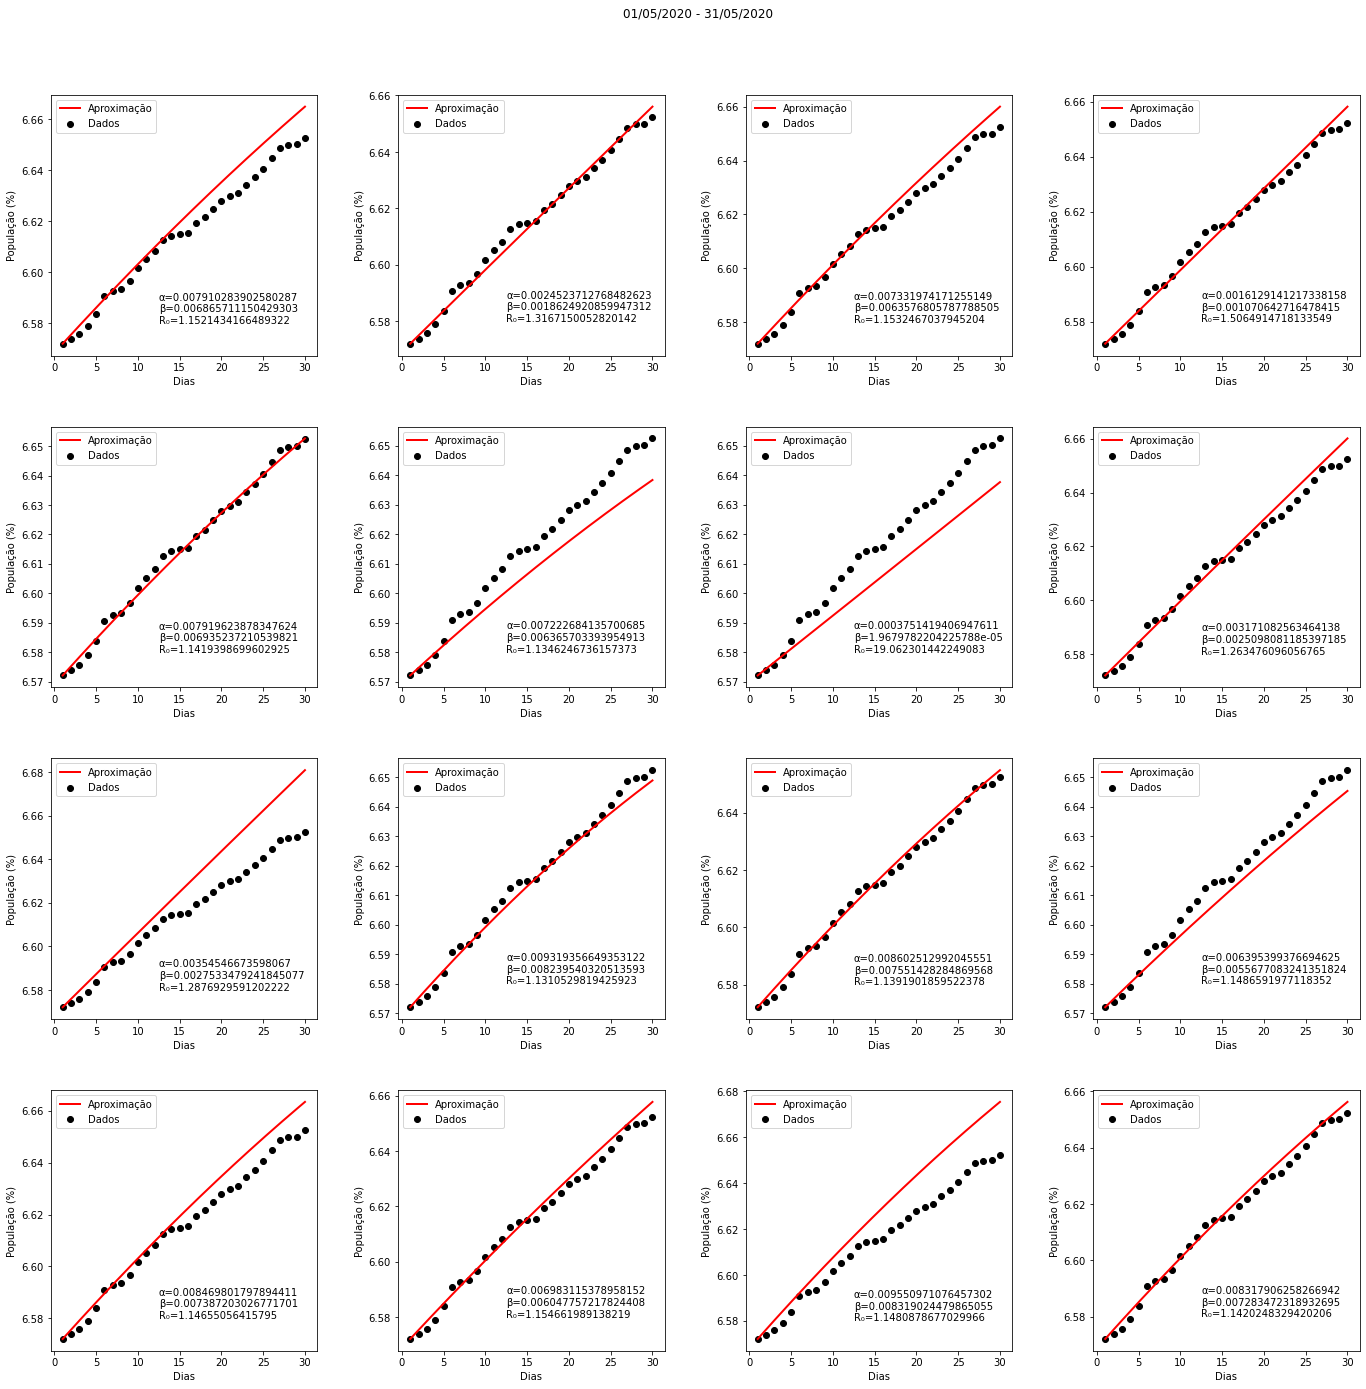

In [10]:
import matplotlib.pyplot as plt

y = [j/9616621 for j in start]

fig, ax = plt.subplots(len(entity)//4, 4, figsize=(20,20))
fig.suptitle('01/05/2020 - 31/05/2020')
fig.tight_layout(pad=5.0)
for i,jj in enumerate(list(zip(al,bt))):
  b = individual(jj[0],jj[1])

  def SIR(t,Y):
      S,I,R = Y
      dS = -b.alpha*S*I
      dI = b.alpha*S*I -b.beta*I
      dR = b.beta*I
      return np.array([dS,dI,dR], float)

  solution = solve_ivp(SIR,[0,len(y)],[1-y[0],y[0],0],t_eval=np.linspace(0, len(y), 1000))
  ax[i//4, i%4].plot(np.linspace(1, len(y), 1000),solution.y[1]*100, color="red",linewidth=2, alpha=1, label="Aproximação")
  ax[i//4, i%4].scatter(list(range(1,len(y)+1)), np.array(y)*100, color='black', label="Dados")
  ax[i//4, i%4].text(12.5,6.58,f'α={b.alpha}\nβ={b.beta}\nR₀={r0[i]}')
  ax[i//4, i%4].legend()
for a in ax.flat:
    a.set(xlabel='Dias', ylabel='População (%)')
plt.show()